In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r'C:\Users\T3DCOMPUTER\Downloads\casestudy.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


No null values. All columns are in the right data types.

In [4]:
del df['Unnamed: 0']

In [5]:
df.head(5)

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [6]:
df['customer_email'] = df['customer_email'].str.replace(' ', '')

## Total revenue per year

In [7]:
total_rev= df.groupby('year').net_revenue.sum().reset_index()
total_rev

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [8]:
total_rev.columns=['year', 'total_rev']

## New Customer Revenue

In [9]:
cus_17=df[df.year == 2017].reset_index()
cus_16=df[df.year == 2016].reset_index()
cus_15=df[df.year == 2015].reset_index()

In [10]:
new_cus_17=cus_17[-cus_17["customer_email"].isin(cus_16["customer_email"])]
new_cus_16=cus_16[-cus_16["customer_email"].isin(cus_15["customer_email"])]

In [11]:
new_rev_17=new_cus_17["net_revenue"].sum()
new_rev_16=new_cus_16["net_revenue"].sum()

In [30]:
print('New customer revenue 2017 is:',new_rev_17)
print('New customer revenue 2016 is:',new_rev_16)

New customer revenue 2017 is: 21769213.009999998
New customer revenue 2016 is: 17206366.900000002


## Existing Customer Growth

In [13]:
exist_cus_17=cus_17.merge(cus_16, how='inner', on='customer_email')
exist_cus_16=cus_16.merge(cus_15, how='inner', on='customer_email')

In [14]:
print('Existing customer growth 2017 is:',exist_cus_17["net_revenue_x"].sum()-exist_cus_17["net_revenue_y"].sum())
print('Existing customer growth 2016 is:',exist_cus_16["net_revenue_x"].sum()-exist_cus_16["net_revenue_y"].sum())

Existing customer growth 2017 is: 63857.060000002384
Existing customer growth 2016 is: 39043.65000000037


## Existing Customer Revenue

In [15]:
print('Existing customer revenue current year (2017) is:',exist_cus_17["net_revenue_x"].sum())
print('Existing customer revenue prior year (2016) is:',exist_cus_17["net_revenue_y"].sum())

Existing customer revenue current year (2017) is: 9648282.020000001
Existing customer revenue prior year (2016) is: 9584424.959999999


In [17]:
print('Existing customer revenue current year (2016) is:',exist_cus_16["net_revenue_x"].sum())
print('Existing customer revenue prior year (2015) is:',exist_cus_16["net_revenue_y"].sum())

Existing customer revenue current year (2016) is: 8524576.69
Existing customer revenue prior year (2015) is: 8485533.04


## New customer

In [18]:
print('New customer email 2017:',new_cus_17['customer_email'])

New customer email 2017: 1         qvjfterwnk@gmail.com
4         fdkiioqtli@gmail.com
5         vpsfdhgrfo@gmail.com
9         pnnenkxlpj@gmail.com
10        qkjragcrsd@gmail.com
                  ...         
249982    qzqttwiftu@gmail.com
249983    pjodiifjop@gmail.com
249984    appaplmgko@gmail.com
249985    wvkpmwsgck@gmail.com
249986    aregboumbw@gmail.com
Name: customer_email, Length: 173449, dtype: object


In [19]:
print('New customer email 2016:',new_cus_16['customer_email'])

New customer email 2016: 0         mwrossuukz@gmail.com
1         gkwsoupawk@gmail.com
2         vlyigtgfzs@gmail.com
3         yfirychuhk@gmail.com
4         trnzgqinuu@gmail.com
                  ...         
204638    tnaiqnnlpb@gmail.com
204639    sqodpufunf@gmail.com
204640    dcakqgznnm@gmail.com
204642    rdotspqdxi@gmail.com
204643    fkweqlmmjw@gmail.com
Name: customer_email, Length: 136891, dtype: object


## Lost customer

In [20]:
lost_cus_17=cus_16[-cus_16["customer_email"].isin(cus_17["customer_email"])]
lost_cus_16=cus_15[-cus_15["customer_email"].isin(cus_16["customer_email"])]

In [21]:
print('Lost customer email 2017:', lost_cus_17['customer_email'])

Lost customer email 2017: 1         gkwsoupawk@gmail.com
4         trnzgqinuu@gmail.com
5         hhxxpwlakg@gmail.com
9         lfeafnigbu@gmail.com
10        cemerinvsn@gmail.com
                  ...         
204639    sqodpufunf@gmail.com
204641    mezrjfkced@gmail.com
204642    rdotspqdxi@gmail.com
204644    pidugzoeej@gmail.com
204645    kxqglfdktu@gmail.com
Name: customer_email, Length: 128108, dtype: object


In [22]:
print('Lost customer email 2016:', lost_cus_16['customer_email'])

Lost customer email 2016: 0         nhknapwsbx@gmail.com
1         joiuzbvcpn@gmail.com
2         ukkjctepxt@gmail.com
3         gykatilzrt@gmail.com
4         mmsgsrtxah@gmail.com
                  ...         
231289    xtrpmgjbwp@gmail.com
231290    peeorxpsbr@gmail.com
231291    vanasezjpw@gmail.com
231292    dnpremlztb@gmail.com
231293    qsgswrpycl@gmail.com
Name: customer_email, Length: 163539, dtype: object


## Total customers per year

In [23]:
print('Total customers 2017:',cus_17.shape[0])
print('Total customers 2016:',cus_16.shape[0])
print('Total customers 2015:',cus_15.shape[0])

Total customers 2017: 249987
Total customers 2016: 204646
Total customers 2015: 231294


## Revenue lost from Attrition

In [31]:
Rev_att_17=(lost_cus_17['net_revenue'].sum()-new_cus_17['net_revenue'].sum())
Rev_att_16=(lost_cus_16['net_revenue'].sum()-new_cus_16['net_revenue'].sum())

In [32]:
print('Revenue attrition 2017:',Rev_att_17)
print('Revenue attrition 2016:',Rev_att_16)

Revenue attrition 2017: -5622694.379999997
Revenue attrition 2016: 3344849.25


## Plot some information

In [26]:
total_rev['total_cus']=[cus_15.shape[0],cus_16.shape[0],cus_17.shape[0]]
total_rev['new_cus']=[0,new_cus_16.shape[0],new_cus_17.shape[0]]
total_rev['new_rev']=[0,new_rev_16,new_rev_17]
total_rev['lost_cus']=[0,lost_cus_16.shape[0],lost_cus_17.shape[0]]
total_rev['lost_rev']=[0,lost_cus_16['net_revenue'].sum(),lost_cus_17['net_revenue'].sum()]

In [27]:
total_rev

,year,total_rev,total_cus,new_cus,new_rev,lost_cus,lost_rev
0,2015,29036749.19,231294,0,0.00,0,0.00
1,2016,25730943.59,204646,136891,17206366.90,163539,20551216.15
2,2017,31417495.03,249987,173449,21769213.01,128108,16146518.63


<Figure size 1080x504 with 0 Axes>

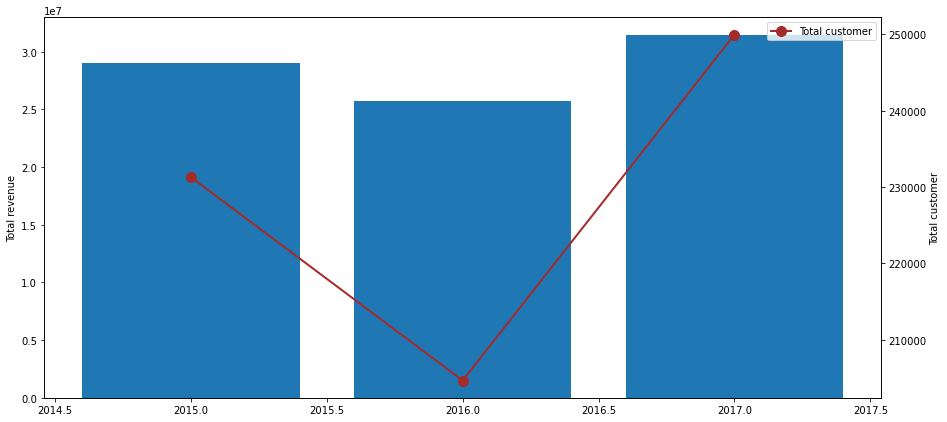

In [38]:
plt.figure(figsize=(15, 7))

xs = total_rev['year']

plt.figure(figsize=(15,7))
plt.bar(xs,total_rev['total_rev'])
plt.ylabel('Total revenue')
plt.twinx()
plt.plot(xs,total_rev['total_cus'],linewidth=2,color='brown',marker='o',markersize=10)
plt.ylabel('Total customer')

plt.legend(['Total customer'])
plt.show()

<Figure size 1080x504 with 0 Axes>

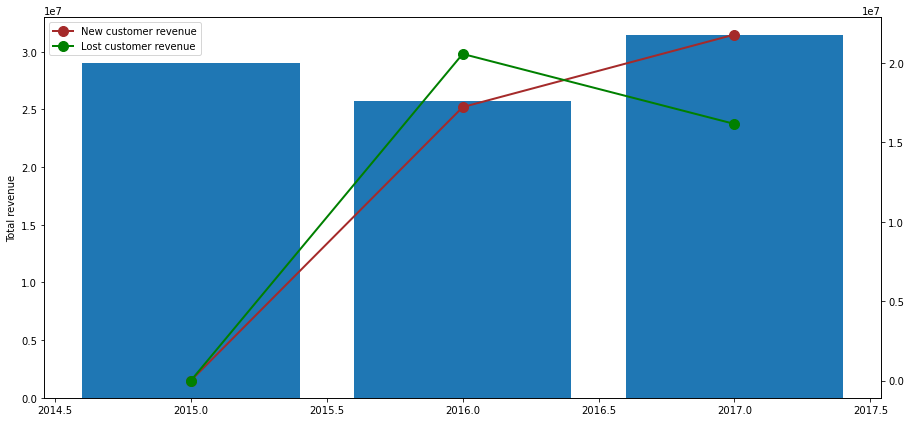

In [39]:
plt.figure(figsize=(15, 7))

xs = total_rev['year']

plt.figure(figsize=(15,7))
plt.bar(xs,total_rev['total_rev'])
plt.ylabel('Total revenue')
plt.twinx()
plt.plot(xs,total_rev['new_rev'],linewidth=2,color='brown',marker='o',markersize=10)
plt.plot(xs,total_rev['lost_rev'],linewidth=2,color='green',marker='o',markersize=10)

plt.legend(['New customer revenue','Lost customer revenue'])
plt.show()